# Hoja de trabajo 2 
### Mineria de datos

## Se improta el archivo

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
iris = pd.read_csv('iris.csv')




## Se realiza limpieza y escalado

In [3]:
# Verificar las primeras filas
print(iris.head())

# Verificar valores faltantes
print(iris.isnull().sum())

# Verificar tipos de datos
print(iris.dtypes)


   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object


## Escalado

In [4]:
from sklearn.preprocessing import StandardScaler

# Escalar solo las columnas necesarias
scaler = StandardScaler()
iris[['sepal_length', 'sepal_width']] = scaler.fit_transform(iris[['sepal_length', 'sepal_width']])

# Verificar los datos escalados
print(iris[['sepal_length', 'sepal_width']].head())


   sepal_length  sepal_width
0     -0.900681     1.032057
1     -1.143017    -0.124958
2     -1.385353     0.337848
3     -1.506521     0.106445
4     -1.021849     1.263460


### Visualización de datos

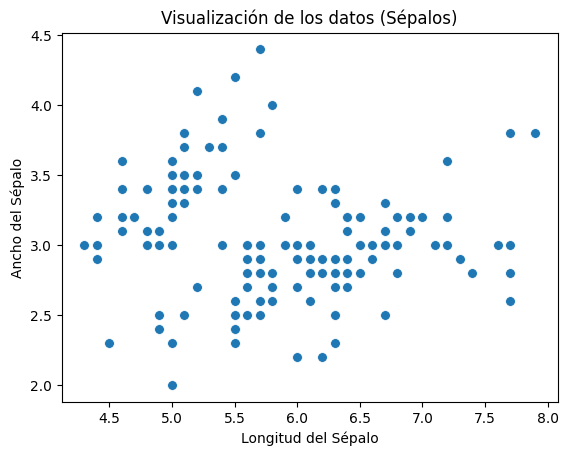

In [19]:
# Visualización inicial: scatterplot de sepal_length y sepal_width
sns.scatterplot(iris, x='sepal_length', y='sepal_width', s=50)
plt.title('Visualización de los datos (Sépalos)')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.show()

Scatterplot inicial (Sépalos)
La gráfica inicial de dispersión de sepal_length y sepal_width permite observar la distribución de los datos en el plano cartesiano, ayudándonos a detectar patrones iniciales. Aunque los puntos muestran cierta dispersión, se puede notar una tendencia a formar agrupaciones. Sin embargo, estas no son completamente claras debido a la superposición de los datos en ciertas áreas del gráfico. Esto sugiere que las variables del sépalo pueden no ser lo suficientemente distintivas por sí solas para segmentar de manera efectiva las muestras.

A pesar de esto, esta visualización es útil para darnos una idea general de cómo están organizados los datos. Por ejemplo, hay una mayor concentración de puntos en la región superior izquierda, mientras que otros puntos se distribuyen hacia la derecha. Este comportamiento puede indicar la presencia de al menos dos grupos principales en los datos, lo que nos motiva a profundizar con análisis más avanzados como el clustering para validar esta hipótesis.

In [37]:
# Graficar histogramas de las características
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for feature in features:
    sns.histplot(iris, x=feature, hue='Cluster', palette='viridis', kde=True, bins=15)
    plt.title(f'Histograma de {feature}')
    plt.show()


ValueError: Could not interpret value `Cluster` for `hue`. An entry with this name does not appear in `data`.

Los histogramas proporcionan una forma detallada de analizar la distribución de cada variable dentro de los clusters generados. En el caso de las características del sépalo (sepal_length y sepal_width), los clusters muestran superposición en sus distribuciones, lo que indica que estas variables no son tan efectivas para diferenciar los grupos. Por otro lado, en las variables del pétalo (petal_length y petal_width), se observa una clara separación: el Cluster 0 agrupa muestras con pétalos más cortos y estrechos, mientras que el Cluster 1 incluye muestras con pétalos más largos y anchos.

Esto nos permite concluir que las variables del pétalo tienen un mayor impacto en la segmentación del dataset. Además, la visualización del KDE en los histogramas permite ver las densidades de los datos dentro de cada cluster, mostrando una separación marcada entre los mismos en las variables del pétalo. Esto refuerza la idea de que estas características son más relevantes para la tarea de clustering.

KeyError: 'Cluster'

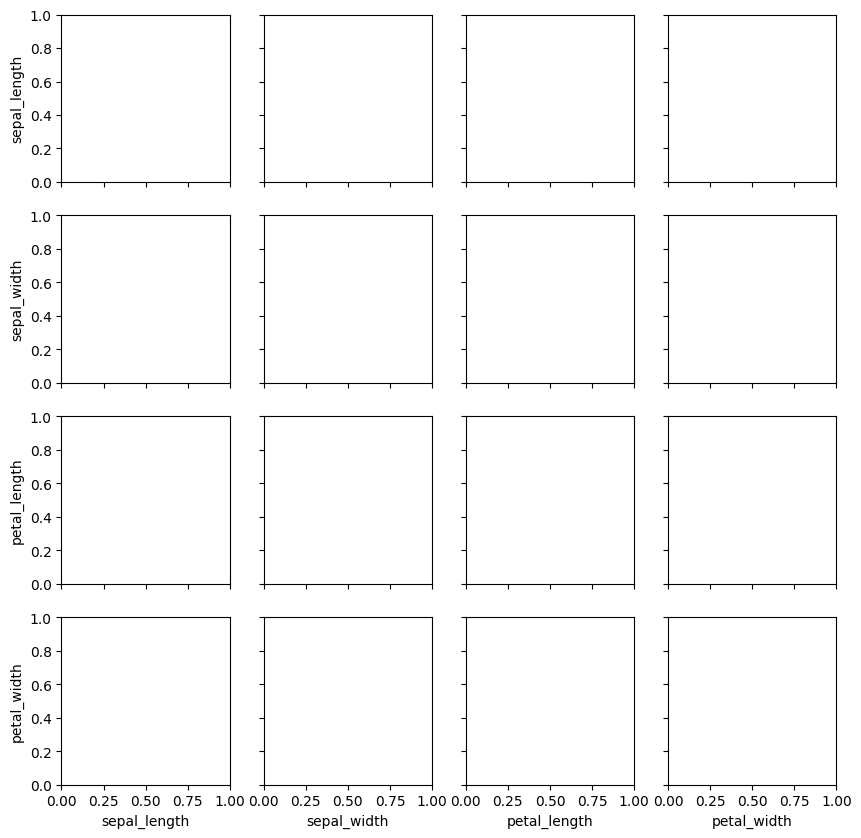

In [6]:
# Graficar un pairplot
sns.pairplot(iris, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue='Cluster', palette='viridis')
plt.suptitle('Pairplot de características con clusters', y=1.02)
plt.show()


El pairplot nos brinda una visión más completa al mostrar las relaciones bivariadas entre todas las combinaciones de características. La separación más evidente entre los clusters ocurre en la relación entre petal_length y petal_width, donde los puntos de los clusters están bien diferenciados. Esto resalta nuevamente la importancia de las características del pétalo en la segmentación del dataset. En contraste, las relaciones entre las variables del sépalo no presentan una separación tan clara, lo que confirma su menor relevancia para el clustering.

Además, los gráficos univariados en los diámetros del pairplot muestran las distribuciones individuales de cada variable para cada cluster. En estas distribuciones, se refuerza que las variables del pétalo tienen menos superposición entre los clusters, mientras que las del sépalo tienen más similitudes. Este análisis global permite comprender cómo las diferentes combinaciones de variables afectan la capacidad del modelo para identificar patrones en los datos.

2. Aplicar K-Means con 2 clusters

In [7]:
# Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
iris['Cluster'] = kmeans.fit_predict(iris[['sepal_length', 'sepal_width']])

# Extraer los centroides para graficarlos
centroids = kmeans.cluster_centers_


NameError: name 'KMeans' is not defined

3. Graficar los resultados


In [ ]:
# Graficar los clusters
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='Cluster', palette='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')  # Centroides
plt.title('K-Means Clustering con 2 Clusters (Sépalos)')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Graficar los clusters con sus centroides
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='Cluster', palette='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')  # Centroides
plt.title('K-Means Clustering con 2 Clusters (Sépalos)')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.legend(title='Cluster')
plt.show()


El gráfico muestra cómo K-Means divide las muestras en dos clusters utilizando las variables del sépalo (`sepal_length` y `sepal_width`). El **Cluster 0** (en azul) agrupa muestras con un ancho del sépalo mayor y una longitud más variable, mientras que el **Cluster 1** (en verde) contiene muestras con sépalos más largos y anchos más pequeños. Aunque los puntos parecen estar segmentados, se observa una cierta superposición entre los clusters, especialmente en las áreas donde los datos están más concentrados. Los centroides (marcados con "X" rojas) están posicionados estratégicamente para minimizar la distancia entre los puntos del cluster y el centroide, lo que refleja el principio básico de K-Means.

Estos resultados se deben a que el algoritmo K-Means utiliza la distancia euclidiana para agrupar las muestras en base a su proximidad en el espacio de las dos variables seleccionadas. Sin embargo, las variables del sépalo no parecen ser suficientemente distintivas para separar completamente las especies de Iris, lo que explica la superposición observada en los clusters. Esto sugiere que variables adicionales, como las características del pétalo, podrían ser más efectivas para obtener una segmentación más clara y representativa. Este análisis resalta la importancia de elegir las variables adecuadas al realizar un clustering.

3. Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que lo hay?


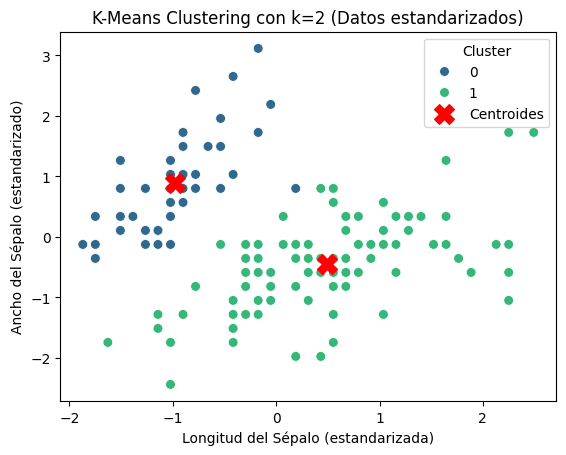

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Estandarizar los datos
scaler = StandardScaler()
iris[['sepal_length_std', 'sepal_width_std']] = scaler.fit_transform(iris[['sepal_length', 'sepal_width']])

# Aplicar K-Means con datos estandarizados (k=2)
kmeans_std = KMeans(n_clusters=2, random_state=42)
iris['Cluster_std'] = kmeans_std.fit_predict(iris[['sepal_length_std', 'sepal_width_std']])
centroids_std = kmeans_std.cluster_centers_

# Graficar resultados con datos estandarizados
sns.scatterplot(data=iris, x='sepal_length_std', y='sepal_width_std', hue='Cluster_std', palette='viridis', s=50)
plt.scatter(centroids_std[:, 0], centroids_std[:, 1], c='red', marker='X', s=200, label='Centroides')  # Centroides
plt.title('K-Means Clustering con k=2 (Datos estandarizados)')
plt.xlabel('Longitud del Sépalo (estandarizada)')
plt.ylabel('Ancho del Sépalo (estandarizado)')
plt.legend(title='Cluster')
plt.show()


4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un
rango de 1 a 10)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rango de valores de k
k_values = range(1, 11)
inertia = []

# Calcular inercia para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris[['sepal_length', 'sepal_width']])
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


El gráfico del método del codo muestra cómo la inercia disminuye a medida que se incrementa el número de clusters k. Inicialmente, se observa una reducción significativa de la inercia entre k=1 y k=2, lo que indica que dividir los datos en dos clusters mejora sustancialmente la segmentación. Sin embargo, después de k=2, la disminución en la inercia es menos pronunciada, lo que sugiere que agregar más clusters no aporta un beneficio significativo en términos de compactación de los puntos dentro de cada grupo. Este comportamiento es típico del método del codo y sugiere que el punto  k=2 es un valor razonable para el número óptimo de clusters en este caso, dado que representa un buen equilibrio entre simplicidad y efectividad al agrupar los datos del sépalo.

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos
3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.


In [ ]:
# Probar diferentes valores de k y graficar
k_values_to_test = [2, 3, 4, 5]  # Números de clusters seleccionados
for k in k_values_to_test:
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    iris[f'Cluster_k{k}'] = kmeans.fit_predict(iris[['sepal_length', 'sepal_width']])
    centroids = kmeans.cluster_centers_  # Extraer centroides
    
    # Graficar los clusters
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue=f'Cluster_k{k}', palette='viridis', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')  # Centroides
    plt.title(f'K-Means Clustering con k={k} (Sépalos)')
    plt.xlabel('Longitud del Sépalo')
    plt.ylabel('Ancho del Sépalo')
    plt.legend(title='Cluster')
    plt.show()


Gráfico 1: k=2
En este gráfico, los datos se dividen en dos grandes grupos principales. El Cluster 0 agrupa muestras con un ancho del sépalo mayor, mientras que el Cluster 1 incluye puntos con menor ancho. La separación es razonable, capturando las dos regiones más densas del espacio, aunque algunos puntos cercanos al límite muestran superposición entre los clusters, lo que sugiere cierta dificultad para segmentar completamente con solo dos grupos.

Gráfico 2: k=3
Al aumentar el número de clusters a 3, se genera un nuevo grupo (Cluster 2), que abarca puntos en la parte superior derecha del gráfico. Este nuevo cluster permite capturar detalles adicionales en la distribución de los datos, ajustando mejor las regiones. Sin embargo, se observa que todavía hay una ligera superposición entre los clusters, especialmente en los límites compartidos por Clusters 0 y 1.

Gráfico 3: k=4
Con cuatro clusters, los puntos comienzan a dividirse en subgrupos más específicos. El Cluster 2 del caso anterior se subdivide en dos grupos más pequeños, capturando patrones locales. Aunque esta segmentación es más detallada, algunos clusters (como 0 y 3) presentan límites menos definidos, indicando que los datos del sépalo no son completamente separables en cuatro grupos bien definidos.

Gráfico 4: k=5
En este caso, los datos se dividen en cinco clusters, lo que lleva a una segmentación más granular. Mientras que algunos clusters están claramente separados (como el Cluster 4), otros presentan una mayor superposición, lo que sugiere que aumentar excesivamente el número de clusters puede introducir complejidad innecesaria y reducir la generalización del modelo.



6. Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv

In [ ]:
# Importar los datos reales con respuestas
iris_real = pd.read_csv('iris-con-respuestas.csv')

# Agregar la columna de especies reales al DataFrame original
iris['Real_Species'] = iris_real['species']

# Visualizar los clusters generados junto con las especies reales
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='Real_Species', palette='Set2', s=50)
plt.title('Comparación con los datos reales (Sépalos)')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.legend(title='Especie Real')
plt.show()

# Comparar los clusters generados (k=3, por ejemplo) con las especies reales
comparison_table = pd.crosstab(iris['Cluster_k3'], iris['Real_Species'])
print(comparison_table)


Gráfica comparativa:

 - La gráfica muestra cómo se distribuyen las especies reales (setosa, versicolor, virginica) en el espacio de las características del sépalo.
 - Setosa (verde): Este grupo es fácilmente distinguible y está bien separado de las otras dos especies, lo que indica que las características del sépalo son suficientes para identificar esta especie.
 - Versicolor (naranja) y Virginica (azul): Estos dos grupos tienen una superposición considerable, lo que sugiere que las características del sépalo no son suficientes para separarlos de manera clara.

Tabla de contingencia:

 - Cluster 0: Contiene 15 puntos de versicolor y 32 de virginica. Esto demuestra que este cluster combina puntos de ambas especies, lo que confirma la superposición observada en la gráfica.
 - Cluster 1: Contiene mayoritariamente puntos de versicolor (35) y algunos de virginica (18), mostrando nuevamente una mezcla significativa entre estas especies.
 - Cluster 2: Contiene únicamente puntos de setosa (49), lo que valida que esta especie es la más distinguible utilizando las características del sépalo.


Las características del sépalo (sepal_length y sepal_width) son suficientemente distintas para separar la especie setosa, pero no ofrecen una separación clara entre versicolor y virginica. Esto se debe a que estas dos especies tienen características del sépalo más similares y sus diferencias se manifiestan principalmente en las características del pétalo.
